In [1]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
 

In [2]:
# load the two input images
imageA = cv2.imread(r'/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/image-difference/image-difference/images/original_01.png')
imageB = cv2.imread(r'/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/image-difference/image-difference/images/modified_01.png')
 
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [3]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9649225306405751


/home/yamshee/anaconda3/lib/python3.5/site-packages/skimage/util/arraypad.py:1537: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


In [4]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [5]:
cnts

[array([[[387, 212]],
 
        [[386, 213]],
 
        [[383, 213]],
 
        [[382, 214]],
 
        [[380, 214]],
 
        [[379, 215]],
 
        [[377, 215]],
 
        [[376, 216]],
 
        [[375, 216]],
 
        [[373, 218]],
 
        [[372, 218]],
 
        [[365, 225]],
 
        [[365, 226]],
 
        [[363, 228]],
 
        [[363, 229]],
 
        [[362, 230]],
 
        [[362, 231]],
 
        [[361, 232]],
 
        [[361, 233]],
 
        [[360, 234]],
 
        [[360, 239]],
 
        [[359, 240]],
 
        [[359, 253]],
 
        [[360, 254]],
 
        [[360, 258]],
 
        [[361, 259]],
 
        [[361, 261]],
 
        [[362, 262]],
 
        [[362, 263]],
 
        [[363, 264]],
 
        [[363, 265]],
 
        [[365, 267]],
 
        [[365, 268]],
 
        [[370, 273]],
 
        [[371, 273]],
 
        [[374, 276]],
 
        [[375, 276]],
 
        [[376, 277]],
 
        [[377, 277]],
 
        [[378, 278]],
 
        [[379, 278]],
 
        [[380, 2

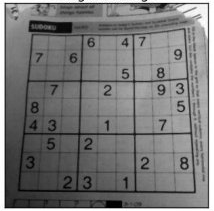

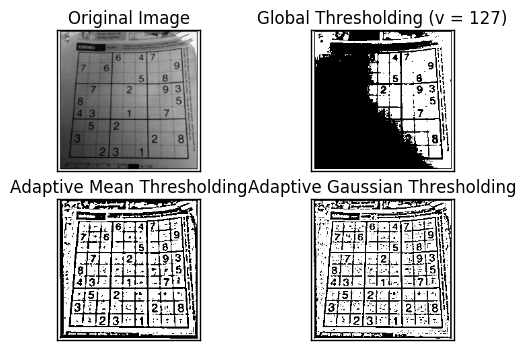

In [44]:
import cv2 as cv
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
from IPython.display import display

img = cv.imread(r'/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/sudoku1.png',0)
#img = cv.medianBlur(img,5)

display(Image.fromarray(img))
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


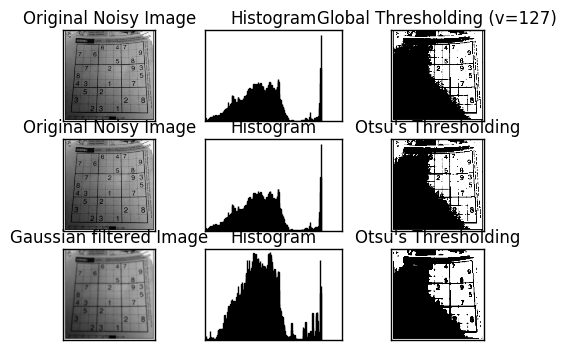

In [46]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(r'/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/sudoku1.png',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()